In [152]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the Titanic dataset. Replace 'titanic.csv' with your own dataset file for your project.
# Ensure the dataset file exists and is in the same directory as this jupyter notebook.
df = pd.read_csv('cars.csv')

# Display the first few rows of the dataframe to ensure it is loaded correctly
display(df.columns)
display(df.head())

Index(['Company Names', 'Cars Names', 'Engines', 'CC/Battery Capacity',
       'HorsePower', 'Total Speed', 'Performance(0 - 100 )KM/H', 'Cars Prices',
       'Fuel Types', 'Seats', 'Torque'],
      dtype='object')

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm


Question 1:

What are the Top 5 Companies possessing the most car models in the dataset?

Company Names
Nissan        149
Volkswagen    109
Porsche        96
Mazda          87
Mitsubishi     60
Name: count, dtype: int64

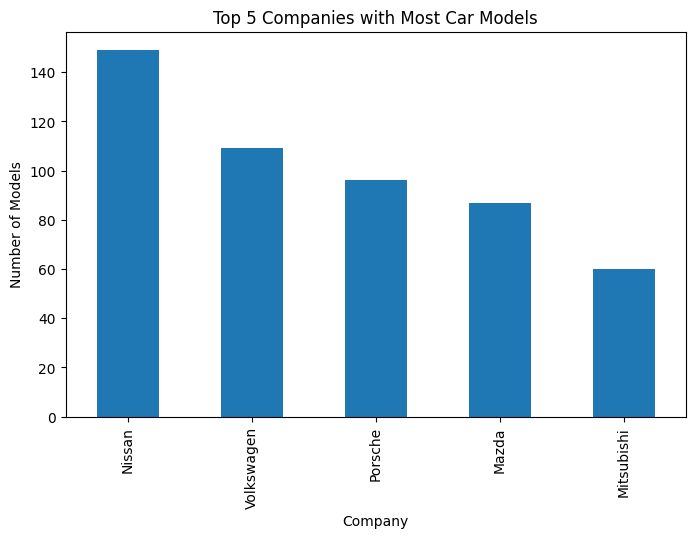

In [153]:

mostcars_top5 = df['Company Names'].value_counts().head(5)

display(mostcars_top5)

#Visualization

plt.figure(figsize=(8,5))
mostcars_top5.plot(kind='bar')
plt.xlabel("Company")
plt.ylabel("Number of Models")
plt.title("Top 5 Companies with Most Car Models")

#plt.savefig("vis/q1.png", dpi=150, bbox_inches="tight")

plt.show()



Question 2

What is the average horsepower for each fuel type



Fuel Types
CNG/Petrol                  86.000000
Diesel                     227.136792
Diesel Hybrid              150.000000
Diesel/Petrol              111.625000
Electric                   366.411111
Gas / Hybrid                      NaN
Hybrid                     320.089744
Hybrid (Gas + Electric)    240.000000
Hybrid (Petrol)            567.500000
Hybrid / Plug-in                  NaN
Hybrid/Electric            139.000000
Hybrid/Petrol              220.500000
Hydrogen                   154.666667
Petrol                     311.680253
Petrol (Hybrid)                   NaN
Petrol, Diesel             225.500000
Petrol, Hybrid             187.000000
Petrol/AWD                 213.500000
Petrol/Diesel              220.875000
Petrol/EV                  147.000000
Petrol/Hybrid              190.968750
Plug-in Hybrid             265.600000
plug in hyrbrid            963.000000
Name: HorsePower, dtype: float64

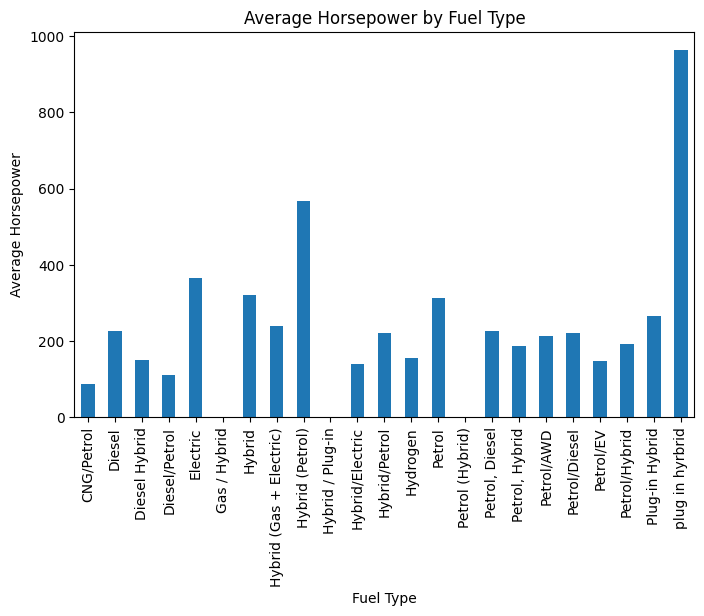

In [154]:
def cleaner(value):
    value = str(value).strip().lower()
    
    if value in ['nan', 'none', '']:
        return np.nan
    
    #Replacing empty string or special characters for value to be extracted
    value = value.replace('$', '').replace(',', '').replace(' hp', '').replace(' cc', '')
    
    if any(sep in value for sep in ['-', '/']):
        for sep in ['-', '/']:
            if sep in value:
                parts = value.split(sep)
                try:
                    low = float(parts[0])
                    high = float(parts[1])
                    return (low + high) / 2
                except (ValueError, IndexError):
                    return np.nan
    
    try:
        return float(value)
    except ValueError:
        return np.nan 
    
    # Handle regular numeric values
    try:
        return float(value)
    except (ValueError, TypeError):
        # Return NaN for any other invalid strings
        return np.nan

df['HorsePower'] = df['HorsePower'].apply(cleaner)


average_hp_fuel = df.groupby('Fuel Types')['HorsePower'].mean()

display(average_hp_fuel)

#Visualization

plt.figure(figsize=(8,5))
average_hp_fuel.plot(kind='bar')
plt.xlabel("Fuel Type")
plt.ylabel("Average Horsepower")
plt.title("Average Horsepower by Fuel Type")

plt.savefig("vis/q2.png", dpi=150, bbox_inches="tight")

plt.show()


Question 3

What is the most expensive car in the dataset, and what are its specifications?

Company Names                            Bugatti
Cars Names                      La Voiture Noire
Engines                      8.0L Quad-Turbo W16
CC/Battery Capacity                      7993 cc
HorsePower                                1500.0
Total Speed                             420 km/h
Performance(0 - 100 )KM/H                2.5 sec
Cars Prices                           18000000.0
Fuel Types                                Petrol
Seats                                          2
Torque                                   1600 Nm
Name: 887, dtype: object


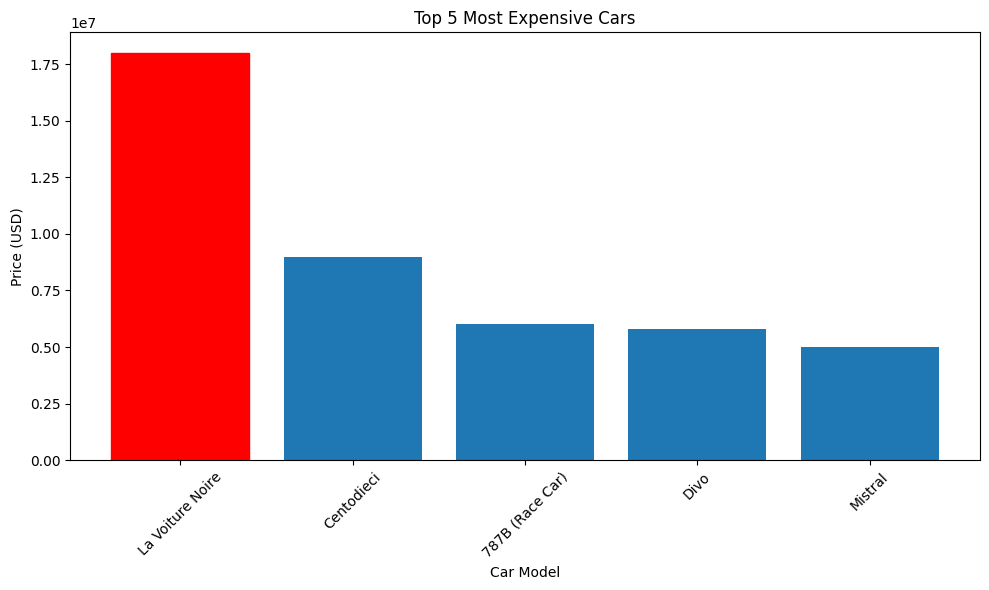

In [155]:

# Clean the 'Cars Prices' column by removing '$', ',', and then use the function
df['Cars Prices'] = df['Cars Prices'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).apply(cleaner)

most_expensive_car_index = df['Cars Prices'].idxmax()
most_expensive_car = df.loc[most_expensive_car_index]

print(most_expensive_car)

#Visualization

top5 = df.sort_values(by='Cars Prices', ascending=False).head(5)

plt.figure(figsize=(10,6))
bars = plt.bar(top5['Cars Names'], top5['Cars Prices'])

# Highlight the most expensive car in red
bars[0].set_color('red')

plt.title("Top 5 Most Expensive Cars")
plt.ylabel("Price (USD)")
plt.xlabel("Car Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("vis/q3.png", dpi=150)
plt.show()

Question 4

How many cars are electric or hybrid, and what is their average 0-100 km/h acceleration?

Number of electric or hybrid cars: 210
Average 0-100 km/h acceleration for these cars: 4.20 seconds


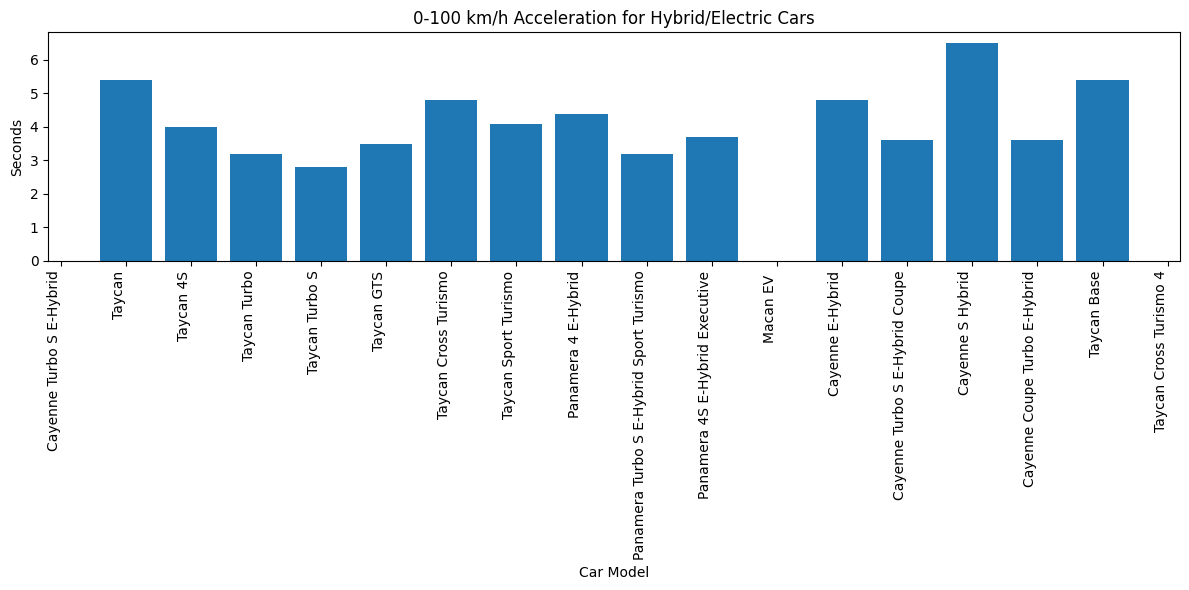

In [156]:
# Cleaner
df['Performance(0 - 100 )KM/H'] = df['Performance(0 - 100 )KM/H'].apply(cleaner)

# Filter for only Hybrid/Electric cars
hybrid_electric_df = df[df['Fuel Types'].str.contains('hybrid|electric', case=False, na=False)]

# Electric/Hybrid Count
car_count = len(hybrid_electric_df)

# Mean
average_acceleration = hybrid_electric_df['Performance(0 - 100 )KM/H'].mean()

print(f"Number of electric or hybrid cars: {car_count}")
print(f"Average 0-100 km/h acceleration for these cars: {average_acceleration:.2f} seconds")

# Visualization
plt.figure(figsize=(12,6))
plt.bar(hybrid_electric_df['Cars Names'], hybrid_electric_df['Performance(0 - 100 )KM/H'])
plt.title("0-100 km/h Acceleration for Hybrid/Electric Cars")
plt.ylabel("Seconds")
plt.xlabel("Car Model")
plt.xticks(rotation=90, ha='right')  # Rotate labels 90° and align right
plt.tight_layout()

plt.savefig("vis/q4.png", dpi=150, bbox_inches="tight")

plt.show()

Question 5

Average Car Price per Company

Company Names
ASTON MARTIN         7.529491e+05
AUDI                 8.287095e+04
Acura                6.325926e+04
BENTLEY              3.110000e+05
BMW                  6.731707e+04
Bugatti              5.870000e+06
Cadillac             6.217850e+04
Chevrolet            4.496293e+04
FERRARI              5.122222e+05
Ford                 5.345769e+04
GMC                  6.329347e+04
HONDA                2.936429e+04
HYUNDAI              3.149561e+04
Jaguar Land Rover    7.212500e+04
Jeep                 5.143921e+04
KIA                  3.409375e+04
KIA                  2.650000e+04
Kia                  3.675926e+04
LAMBORGHINI          6.500833e+05
MAHINDRA             1.840000e+04
MARUTI SUZUKI        1.206667e+04
MERCEDES             8.419048e+04
Mazda                9.382558e+04
Mitsubishi           2.885000e+04
NISSAN               3.960000e+04
Nissan               6.050966e+04
Peugeot              3.541667e+04
Porsche              1.383896e+05
ROLLS ROYCE          3.924138e+05


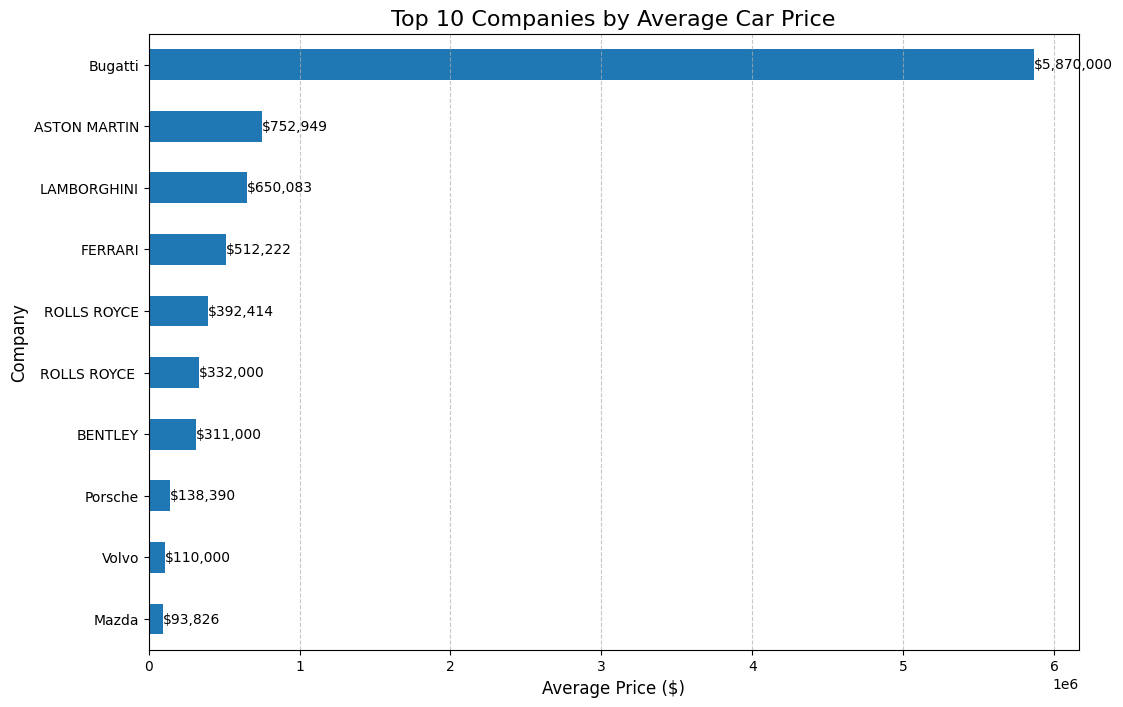

In [157]:

# Clean the 'Cars Prices' column
df['Cars Prices'] = df['Cars Prices'].apply(cleaner)

# Calculate the average price by company
average_price_by_company = df.groupby('Company Names')['Cars Prices'].mean()

print(average_price_by_company)


# Visualization


top_10_prices = average_price_by_company.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
top_10_prices.sort_values().plot(kind='barh')

plt.title('Top 10 Companies by Average Car Price', fontsize=16)
plt.xlabel('Average Price ($)', fontsize=12)
plt.ylabel('Company', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.savefig("vis/q5.png", dpi=150, bbox_inches="tight")

# Value labels on bars
for index, value in enumerate(top_10_prices.sort_values()):
    plt.text(value, index, f'${value:,.0f}', va='center', ha='left', fontsize=10)



Question 6

What are the top fastest accelerating cars (based on mph)

,Company Names,Cars Names,Performance(0 - 100 )KM/H
554,Porsche,911 Turbo S,2.6
553,Porsche,911 Turbo,2.7
561,Porsche,Taycan Turbo S,2.8


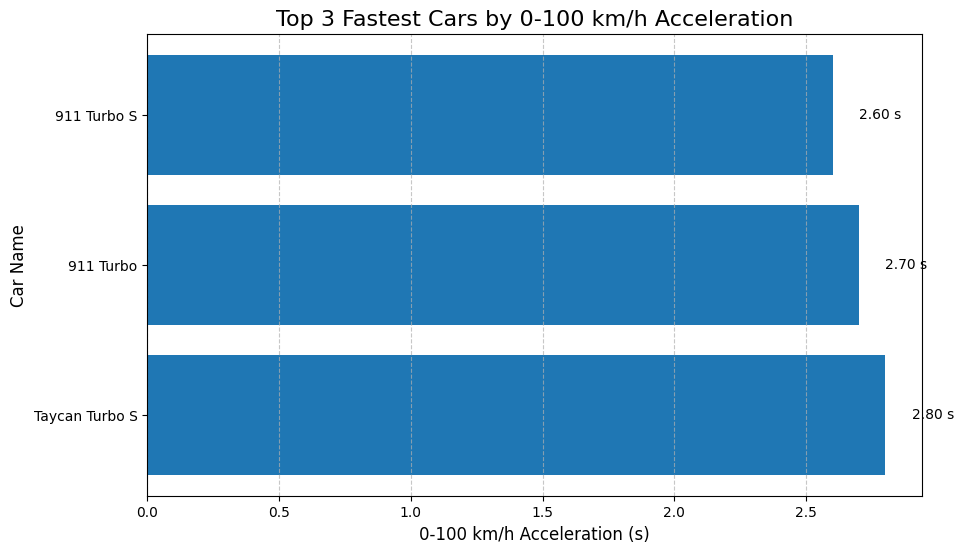

In [158]:
df['Performance(0 - 100 )KM/H'] = df['Performance(0 - 100 )KM/H'].apply(cleaner)
fastest_cars = df.sort_values(by='Performance(0 - 100 )KM/H').head(3)
display(fastest_cars[['Company Names', 'Cars Names', 'Performance(0 - 100 )KM/H']])

# Visualization

# Clean DF
df['Performance(0 - 100 )KM/H'] = df['Performance(0 - 100 )KM/H'].apply(cleaner)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(fastest_cars['Cars Names'], fastest_cars['Performance(0 - 100 )KM/H'])
plt.xlabel('0-100 km/h Acceleration (s)', fontsize=12)
plt.ylabel('Car Name', fontsize=12)
plt.title('Top 3 Fastest Cars by 0-100 km/h Acceleration', fontsize=16)
plt.gca().invert_yaxis() # Invert y-axis to show fastest at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.savefig("vis/q6.png", dpi=150, bbox_inches="tight")

# Value labels on bars
for index, value in enumerate(fastest_cars['Performance(0 - 100 )KM/H']):
    plt.text(value + 0.1, index, f'{value:.2f} s', va='center', fontsize=10)



Question 7

Horsepower to Price Comparison

,HorsePower,Cars Prices
HorsePower,1.000000,0.516437
Cars Prices,0.516437,1.000000


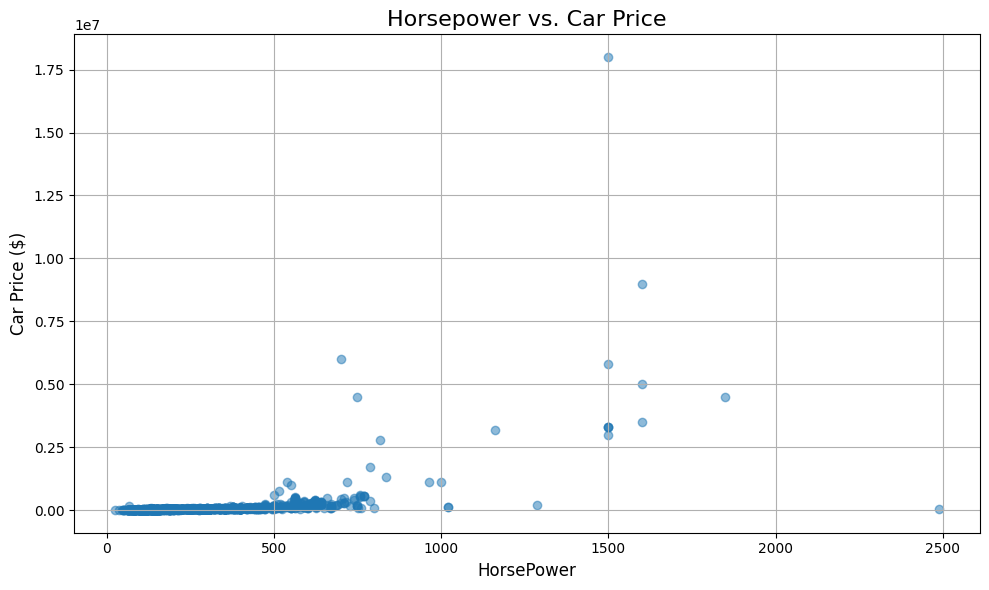

In [159]:
df['HorsePower'] = df['HorsePower'].apply(cleaner)
df['Cars Prices'] = df['Cars Prices'].apply(cleaner)
correlation = df[['HorsePower', 'Cars Prices']].corr()
display(correlation)

#Visualization

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['HorsePower'], df['Cars Prices'], alpha=0.5)
plt.title('Horsepower vs. Car Price', fontsize=16)
plt.xlabel('HorsePower', fontsize=12)
plt.ylabel('Car Price ($)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig("vis/q7.png", dpi=150, bbox_inches="tight")



Question 8

What is the distribution of Seats across all car models?


Seats
5.0     692
4.0     161
7.0     147
2.0     136
8.0      29
6.0      20
3.0      14
1.0       3
20.0      1
15.0      1
12.0      1
9.0       1
Name: count, dtype: int64

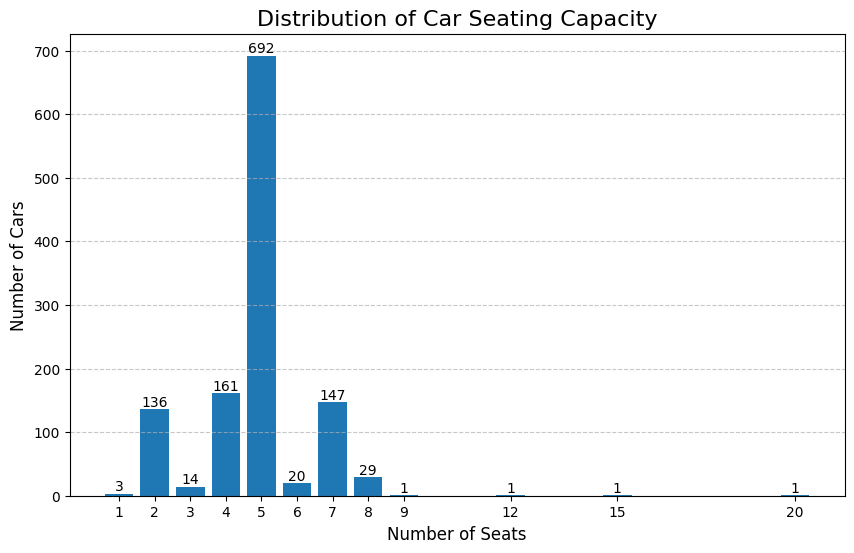

In [160]:
df['Seats'] = df['Seats'].apply(cleaner)
seating_distribution = df['Seats'].value_counts()
display(seating_distribution)


# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(seating_distribution.index, seating_distribution.values)
plt.title('Distribution of Car Seating Capacity', fontsize=16)
plt.xlabel('Number of Seats', fontsize=12)
plt.ylabel('Number of Cars', fontsize=12)
plt.xticks(seating_distribution.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig("vis/q8.png", dpi=150, bbox_inches="tight")

# Value labels on bars
for index, value in enumerate(seating_distribution.values):
    plt.text(seating_distribution.index[index], value, f'{int(value)}', ha='center', va='bottom', fontsize=10)


Question 9

Which Car Name has the highest Speed for each Company?

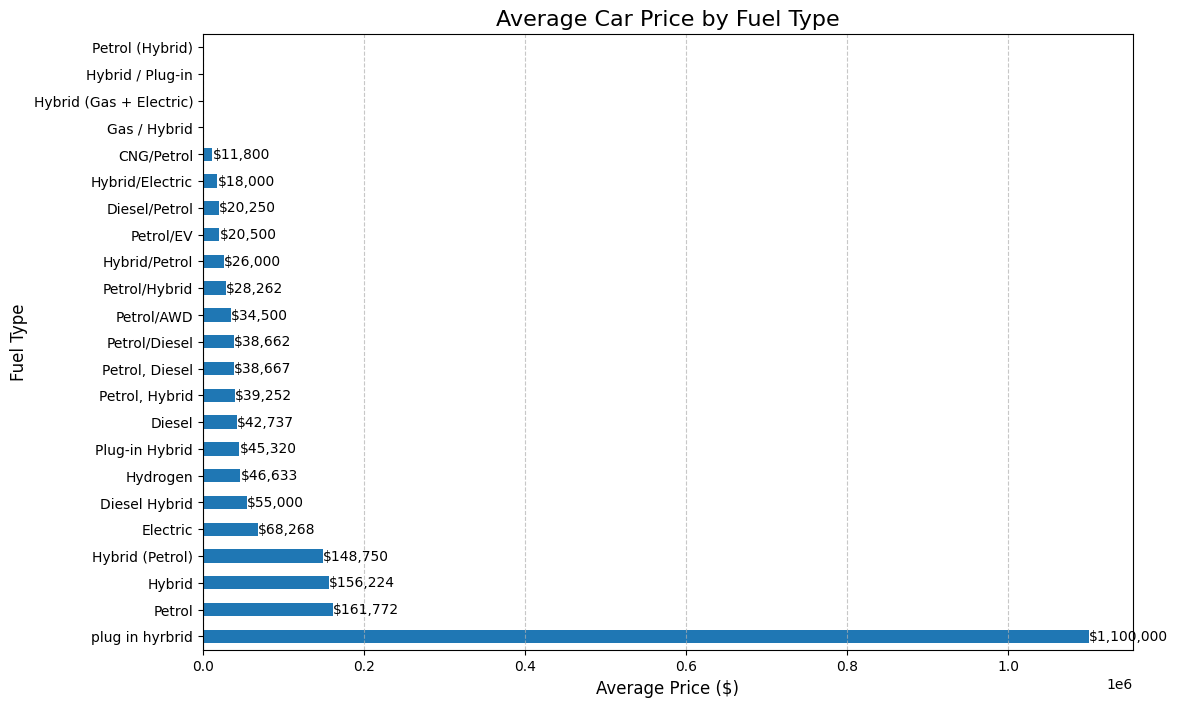

In [161]:
# Clean the 'Cars Prices' column
df['Cars Prices'] = df['Cars Prices'].apply(cleaner)

# Calculate the average price per fuel type
avg_price_by_fuel = df.groupby('Fuel Types')['Cars Prices'].mean().sort_values(ascending=False)


# Visualization


# Create a horizontal bar chart
plt.figure(figsize=(12, 8))
avg_price_by_fuel.plot(kind='barh')
plt.title('Average Car Price by Fuel Type', fontsize=16)
plt.xlabel('Average Price ($)', fontsize=12)
plt.ylabel('Fuel Type', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.savefig("vis/q9.png", dpi=150, bbox_inches="tight")

# Value labels on bars
for index, value in enumerate(avg_price_by_fuel):
    plt.text(value, index, f'${value:,.0f}', va='center', ha='left', fontsize=10)


Question 10

What are the three most common Engine types in the dataset?

Engines
I4     64
V12    51
V6     39
Name: count, dtype: int64

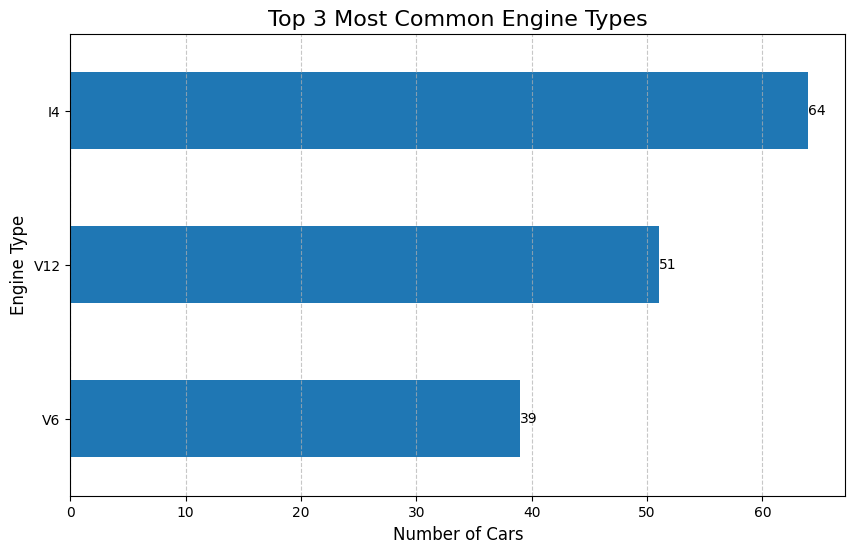

In [162]:
top_3_engines = df['Engines'].value_counts().head(3)
display(top_3_engines)

# Visualization

# Horizontal bar chart
plt.figure(figsize=(10, 6))
top_3_engines.sort_values().plot(kind='barh')
plt.title('Top 3 Most Common Engine Types', fontsize=16)
plt.xlabel('Number of Cars', fontsize=12)
plt.ylabel('Engine Type', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.savefig("vis/q10.png", dpi=150, bbox_inches="tight")

# Value labels on bars
for index, value in enumerate(top_3_engines.sort_values()):
    plt.text(value, index, f'{int(value)}', va='center', ha='left', fontsize=10)
